# Project / Clustering and Basic Classification

__This Project is worth up to 30 POINTS to your grade total if you turn it in on time. 

## OBJECTIVES
* Learn some of the clustering features of [Scikit-learn](http://scikit-learn.org/stable/modules/clustering.html) to do partitioning and hierarchical clustering ($k$-Means and hierarchical clustering algorithms);
* Learn about document clustering, and document similarity scoring using TFIDF;
* Using built-in $k$-nearest neighbor and interpret the output in Scikit-learn -- this is an extension of the implementation you did last time;
* Learn how to binarize categorical variables in Scikit-learn;
* Learn how to use `DecisionTreeClassifier` to build a basic classifier.

## WHAT TO TURN IN

You are being encouraged to turn the assignment in using the provided Jupyter Notebook.  To do so, clone the repository and modify the `Homework2.ipynb` file in the `HOMEWORK/02` directory.


Turn in a copy of a ipynb file OR a PDF or Word Document to Blackboard with the answers to the questions labeled with the &#167; sign.

## RESOURCES

| What | Where |
|:----------------------------------:|:---------------------:|
| SciPy clustering documentation | [SciPy.org](http://scikit-learn.org/stable/modules/clustering.html) |
| A very recent (Oct. 3, 2016) write up on Data Mining in Python. | [Data Mining and Algorithms (Springboard Education)](https://www.springboard.com/blog/data-mining-python-tutorial/) |
| A nice writeup on $k$-means. | [Clustering With K-Means in Python (The Data Science Lab)](https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/) |
|TFIDF in Scikit-learn. |[Scikit-learn Text Feature Extraction](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)|
|**DATASET** of top 1000 movies on IMDB by user ratings.  This data has been stored in the [data directory](./data). | [IMDB Top 1000 @ icheckmovies.com](https://www.icheckmovies.com/lists/imdb+top+1000/lampadatriste/) |
|**API** that is used to access IMDB movie metadata. | [OMDB API at omdbapi.com](http://omdbapi.com/) |
|**DATASET** of consumer debt complaints. | [US Federal Consumer Financial Protection Bureau](http://www.consumerfinance.gov/data-research/consumer-complaints/) |

## HOW TO COMPLETE THIS PROJECT + PROJECT DETAILS

### DATA FOR PART 1

We will be using data from [IMDB](http://imdb.com) and working with movie data.  IMDB is a movie database that is widely used to learn about (and rate) movies.  Much of the work around movies focuses on predicting ratings -- for example, the [Netflix Prize contest](http://netflixprize.com/) was designed to encourage developers to explore better algorithms for rating movies.  Instead of predicting ratings, we will work instead with **clustering the plots of movies**.  Data will come from the [OMDB API](http://omdbapi.com/) which allows a developer to extract information from IMDB programmatically since there is no open public API directly published by IMDB. 

You can view the [notebook here](./preliminaries.ipynb) to see how the data was extracted, but you can skip that step and look directly at the file which is the output of that data.  Also, you can find the data for this assignment in [`data`](./data) directory, and in it you will see a TSV file called 

* [data/top1000_movie_summaries.tsv](./data/top1000_movie_summaries.tsv).

In that file, you will notice 1000 movie summaries -- the first column is the movie name, the second is the plot summary from OMDB and looks like this:

```txt
...
The Shawshank Redemption	Chronicles the experiences of a formerly successful banker as a prisoner in the gloomy jailhouse of Shawshank after being found guilty of a crime he did not commit. The film portrays the man's unique way of dealing with his new, torturous life; along the way he befriends a number of fellow prisoners, most notably a wise long-term inmate named Red.
The Godfather	When the aging head of a famous crime family decides to transfer his position to one of his subalterns, a series of unfortunate events start happening to the family, and a war begins between all the well-known families leading to insolence, deportation, murder and revenge, and ends with the favorable successor being finally chosen.
The Godfather: Part II	The continuing saga of the Corleone crime family tells the story of a young Vito Corleone growing up in Sicily and in 1910s New York; and follows Michael Corleone in the 1950s as he attempts to expand the family business into Las Vegas, Hollywood and Cuba.
...
```

### BACKGROUND FOR PART 1 
Document clutstering is a common task in text mining and has broad applications in a variety of contexts.  In the unsupervised context, such clustering provides insights into a set of documents and the common features they share.  In the supervised context such clustering allows one to train and subsequently classify documents.  For example, if one were to determine of a document is of a certain kind (e.g. legal, academic) one can use labeled instances to learn the features that would allow the discrimination of unlabeled/unseen instances.

There are several good resources in information retrieval that you may want to bookmark for future reference in text mining and information retrieval generally:

* Manning, C.D., Raghavan, P. and Schütze, H. (2008) Introduction to Information Retrieval.  doi:  [http://dx.doi.org/10.1017/CBO9780511809071](http://dx.doi.org/10.1017/CBO9780511809071);  Available at: [Stanford NLP - Information Retrieval](http://nlp.stanford.edu/IR-book/information-retrieval-book.html).



#### DOCUMENT ANALYSIS: TERM FREQUENCY (TF) AND INVERSE DOCUMENT FREQUENCY (TF)

The intuition behind analyzing words in documents hinges on the following:

* terms that are frequent _in documents_ are given higher importance than those that are infrequent
* terms that are frequent _across_ documents are not considered as important

that is _common_ words across an entire corpus are *discounted* while 
those that are _common_ within documents are *boosted*.


#### DOCUMENT ANALYSIS: TERM FREQUENCY INVERSE DOCUMENT FREQUENCY (TFIDF)

To realize the above, we will introduce a concept all TFIDF, which is composed of two parts, the TF (or **term frequency**) and the IDF (**inverse document frequency**).

Let's break these two down and then put them back together.

**Term frequency (TF)** is a simple concept and is exactly as it says: the _counts_ of terms in a document.  So for a term (word) $t$ and document $d$, the TF is just the number of occurences of $t$ in $d$,

$$\textrm{tf}(t,d) = \big| t \in d \big|$$

**Inverse document frequency (IDF)** provides a way to determine if a terms is rare or common given _all_ documents $D$, and is logarithmically scaled so rare terms avoid completely disappearing.  Thus,

$$
\textrm{idf}(t,D) = { \big| D \big| \over {1 + \big| \{t \in d | d \in D \} \big| } }
$$

**TFIDF** is thus: for a set of documents (corpus) $D$ and document $d \in D$ and terms $t \in d$,

$$
\textrm{tfidf}(t,d,D)= \textrm{tf}(t,d,D) \cdot \textrm{idf}(t,D)
$$

#### TFIDF in ScikitLearn
Luckily we need only recall the details of the notions of these techniques and not implement them.  In Scikitlearn, most of the machinery of TFIDF is done for us using `CountVectorizer`, [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer).

In [2]:
%matplotlib inline

### A TFIDF Example

Let us consider loading the first 50 plots of the plots file.  The code below will read the first 50 lines of the plot summary file and store them in a `dict` for further processing.

In [1]:
import csv

plots_50 = {}
with open("./data/top1000_movie_summaries.tsv") as fi:
    tsvReader = csv.reader(fi, delimiter='\t')
    for i, (title, plot) in enumerate(tsvReader):
        plots_50[title]=plot
        if i == 49:
            break

IOError: [Errno 2] No such file or directory: './data/top1000_movie_summaries.tsv'

In [4]:
plots_50.keys()[:10]

["It's a Wonderful Life",
 'Seven Samurai',
 'The Godfather: Part II',
 'The Green Mile',
 'Modern Times',
 'Se7en',
 'The Matrix',
 'Sunset Boulevard',
 'Once Upon a Time in the West',
 'Memento']

Now that we have the data, we're going to use some built in implementations of Tfidf to do some interesting things with the docoment data.  Recall what we want is to create a way to represent all terms in the document, and then from there score the terms over _all documents_ and _within documents_.

**IMPORTANT:** You should read the documentation in Scikit-learn about the [TfidfVectorizer]() to dig in deeper on this issue.

**NOTE:** as input to the vectorizer, we must pass all the plot summaries dictionary given by `values()` which returns the dictionary values for all keys _in order_ they are stored in the dictionary. 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)
# create the tfidf matrix
tfidf_matrix = vectorizer.fit_transform(plots_50.values())

# convert the matrix to an array - which reduces the sparseness of the matrix
tfidf_array = tfidf_matrix.toarray()

Now what we can do is see the terms and their tfidf scores.

Let us consider the first find out what the terms of our corpus is -- recall these are just all the terms of the _plot summaries we have seen_, which are represented in the `plots_50` variable.

Since there are **many** terms, we will just display the first 100!

In [6]:
vectorizer.get_feature_names()[:100]

[u'000',
 u'1000',
 u'1100',
 u'12',
 u'15',
 u'17',
 u'1910s',
 u'1930s',
 u'1936',
 u'1944',
 u'1950s',
 u'2nd',
 u'30',
 u'40',
 u'abandoned',
 u'ability',
 u'abject',
 u'able',
 u'about',
 u'absolute',
 u'absolution',
 u'accepts',
 u'access',
 u'accidentally',
 u'accomplish',
 u'accused',
 u'action',
 u'actions',
 u'acts',
 u'addition',
 u'advance',
 u'advanced',
 u'adventure',
 u'adventurous',
 u'affected',
 u'african',
 u'after',
 u'again',
 u'against',
 u'agency',
 u'agent',
 u'aging',
 u'aid',
 u'alfred',
 u'alimony',
 u'alive',
 u'all',
 u'alleviate',
 u'alliance',
 u'allied',
 u'allowing',
 u'allows',
 u'ally',
 u'almost',
 u'alone',
 u'along',
 u'also',
 u'always',
 u'america',
 u'american',
 u'amid',
 u'amidst',
 u'amount',
 u'amusement',
 u'an',
 u'ancient',
 u'and',
 u'angel',
 u'angier',
 u'another',
 u'answers',
 u'apartment',
 u'approach',
 u'aragorn',
 u'archeology',
 u'are',
 u'area',
 u'aristocratic',
 u'ark',
 u'army',
 u'around',
 u'arrives',
 u'art',
 u'artifact'

In [7]:
vectorizer.idf_

array([ 3.83321334,  4.23867845,  4.23867845, ...,  4.23867845,
        2.53393036,  4.23867845])

Now that we know what is represented, let's go forward with the tfidf array.  Remember that array stores the document (plot summary) tfidf scores (in the order they appear in the dictionary they are stored.

Thus, if the first item in plots_50 is "It's a Wonderful Life" then `tfidf_array[0]` is the tfidf scores for that over all the words in the corpus.  

Let's prove this so ...

In [8]:
plots_50[plots_50.keys()[0]]  # it's a wonderful life is the first movie

"George Bailey has spent his entire life giving of himself to the people of Bedford Falls. He has always longed to travel but never had the opportunity in order to prevent rich skinflint Mr. Potter from taking over the entire town. All that prevents him from doing so is George's modest building and loan company, which was founded by his generous father. But on Christmas Eve, George's Uncle Billy loses the business's $8,000 while intending to deposit it in the bank. Potter finds the misplaced money and hides it from Billy. When the bank examiner discovers the shortage later that night, George realizes that he will be held responsible and sent to jail and the company will collapse, finally allowing Potter to take over the town. Thinking of his wife, their young children, and others he loves will be better off with him dead, he contemplates suicide. But the prayers of his loved ones result in a gentle angel named Clarence coming to earth to help George, with the promise of earning his win

The follow code will just return the scores from the first movie **only** for the terms with a score **greater than 0**.

In [9]:
[(score, term)  for score, term in zip(tfidf_array[1], vectorizer.get_feature_names()) if score > 0]

[(0.13547779388675404, u'40'),
 (0.091484972436923995, u'and'),
 (0.14980820375807655, u'answers'),
 (0.14980820375807655, u'attack'),
 (0.27095558777350809, u'bandits'),
 (0.11742361261454501, u'battle'),
 (0.14980820375807655, u'culminates'),
 (0.13547779388675404, u'day'),
 (0.14980820375807655, u'defend'),
 (0.14980820375807655, u'fallen'),
 (0.11742361261454501, u'film'),
 (0.072151389045991207, u'for'),
 (0.072151389045991207, u'from'),
 (0.14980820375807655, u'gathers'),
 (0.14980820375807655, u'giant'),
 (0.13547779388675404, u'hard'),
 (0.078595205258502346, u'has'),
 (0.072151389045991207, u'he'),
 (0.10553162742351276, u'help'),
 (0.089557054150858795, u'him'),
 (0.13547779388675404, u'how'),
 (0.049673549354238587, u'in'),
 (0.14980820375807655, u'meals'),
 (0.068427617645104688, u'on'),
 (0.10081220878863621, u'other'),
 (0.14980820375807655, u'protection'),
 (0.12531020627335637, u'request'),
 (0.44942461127422967, u'samurai'),
 (0.11742361261454501, u'small'),
 (0.149808

Now let's get the similarity between two documents.

We have talked about several distance metrics in previous lectures, and now we can think more about the metrics and less about the implementation.

You will find Scikit-learn has a number of [really popular metrics already implemented](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)!

### &#167; WARMUP Take the first 10 plot summaries and find the summaries they are most similar to Euclidean and Cosine Similarity

* Euclidean distance metrics can be done using [sklearn.metrics.pairwise.euclidean_distances](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html#sklearn.metrics.pairwise.euclidean_distances) and
* cosine similarity will be done using [sklearn.metrics.pairwise.cosine_similarity](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn.metrics.pairwise.cosine_similarity).

### &#167; WARMUP Discuss the differences or similarity between the results executing the code below.

In [10]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
import numpy as np

dist = euclidean_distances(tfidf_matrix, tfidf_matrix)
dist2 = cosine_similarity(tfidf_matrix, tfidf_matrix)
print 'Euclidean'
for element in range(0,10):

    closer = np.sort(dist[element])[1]
    value =np.where(dist[element] ==closer)[0]
    print plots_50.keys()[element] +' is closer to ' +plots_50.keys()[value]
print '\n\nCosine'

for element in range(0,10):

    closer = np.sort(dist2[element])[1]
    value =np.where(dist2[element] ==closer)[0]
    print plots_50.keys()[element] +' is closer to ' +plots_50.keys()[value[0]]

Euclidean
It's a Wonderful Life is closer to Gladiator
Seven Samurai is closer to The Silence of the Lambs
The Godfather: Part II is closer to 12 Angry Men
The Green Mile is closer to 12 Angry Men
Modern Times is closer to City Lights
Se7en is closer to 12 Angry Men
The Matrix is closer to One Flew Over the Cuckoo's Nest
Sunset Boulevard is closer to The Silence of the Lambs
Once Upon a Time in the West is closer to Star Wars: Episode IV - A New Hope
Memento is closer to Gladiator


Cosine
It's a Wonderful Life is closer to The Usual Suspects
Seven Samurai is closer to Baahubali: The Beginning
The Godfather: Part II is closer to Fight Club
The Green Mile is closer to Fight Club
Modern Times is closer to Sunset Boulevard
Se7en is closer to The Good, the Bad and the Ugly
The Matrix is closer to Fight Club
Sunset Boulevard is closer to Modern Times
Once Upon a Time in the West is closer to Forrest Gump
Memento is closer to Modern Times


C:\Users\Sosa\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


```python
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

def test_similarity(type):
    if type == 'euc':
        max_n = 5
        sim = euclidean_distances
    elif type == 'cos':
        max_n = -5
        sim = cosine_similarity
        
    for i in xrange(0,20):
        test_data = sim(tfidf_matrix)[i]
        #max_n, test_data =  5, euclidean_distances(tfidf_matrix)[i]

        if max_n < 0:
            top_most_similar = zip(test_data.argsort()[max_n:],test_data[test_data.argsort()[max_n:]])
            idx, value = top_most_similar[-2]
        else:
            top_most_similar = zip(test_data.argsort()[:max_n],test_data[test_data.argsort()[:max_n]])
            idx, value = top_most_similar[1]

        # print top_most_similar
        print "{} ({}, {}) and {}({}) are most similar.".format(plots_50.keys()[idx], idx, value, plots_50.keys()[i], i)
        
test_similarity('cos')   
print "\n"
test_similarity('euc') 
```

In [11]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

def test_similarity(type):
    if type == 'euc':
        max_n = 5
        sim = euclidean_distances
    elif type == 'cos':
        max_n = -5
        sim = cosine_similarity

    for i in xrange(0,20):
        test_data = sim(tfidf_matrix)[i]
        #max_n, test_data =  5, euclidean_distances(tfidf_matrix)[i]

        if max_n < 0:
            top_most_similar = zip(test_data.argsort()[max_n:],test_data[test_data.argsort()[max_n:]])
            idx, value = top_most_similar[-2]
        else:
            top_most_similar = zip(test_data.argsort()[:max_n],test_data[test_data.argsort()[:max_n]])
            idx, value = top_most_similar[1]

        # print top_most_similar
        print "{} ({}, {}) and {}({}) are most similar.".format(plots_50.keys()[idx], idx, value, plots_50.keys()[i], i)

test_similarity('cos')   
print "\n"
test_similarity('euc')

Gladiator (46, 0.272774628312) and It's a Wonderful Life(0) are most similar.
The Silence of the Lambs (35, 0.14657397934) and Seven Samurai(1) are most similar.
12 Angry Men (21, 0.178139981308) and The Godfather: Part II(2) are most similar.
12 Angry Men (21, 0.165832766602) and The Green Mile(3) are most similar.
City Lights (18, 0.187545697261) and Modern Times(4) are most similar.
12 Angry Men (21, 0.235447989478) and Se7en(5) are most similar.
One Flew Over the Cuckoo's Nest (44, 0.139948368223) and The Matrix(6) are most similar.
The Silence of the Lambs (35, 0.0647963880422) and Sunset Boulevard(7) are most similar.
Star Wars: Episode IV - A New Hope (24, 0.10884421161) and Once Upon a Time in the West(8) are most similar.
Gladiator (46, 0.103356077241) and Memento(9) are most similar.
Gladiator (46, 0.190659373598) and Life Is Beautiful(10) are most similar.
12 Angry Men (21, 0.17309061434) and The Prestige(11) are most similar.
The Departed (43, 0.120270976841) and Pulp Ficti

## Part 1 / Document Clustering

### &#167; Load the 1000 OMDB summaries in to a Python list called `sample_docs`


In [12]:
import csv

sample_docs = {}
with open("./data/top1000_movie_summaries.tsv") as fi:
    tsvReader = csv.reader(fi, delimiter='\t')
    for i, (title, plot) in enumerate(tsvReader):
        sample_docs[title]=plot

### &#167; Use `TfidfVectorizer` to load the documents into an array

You will need to explore how to do this with the [example here]().

Once you have your vectorizer and array, you can use the `get_feature_names()` method on `TfidfVectorizer` to get the document terms and their Tfidf scores.  

### &#167; Use `get_feature_names()` to display the top 10 terms and their Tfidf scores  of just the first document

**HINT**
The method and its usage can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names).


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)
# create the tfidf matrix
tfidf_matrix = vectorizer.fit_transform(sample_docs.values())

# convert the matrix to an array - which reduces the sparseness of the matrix
tfidf_array = tfidf_matrix.toarray()

foo = [(score, term)  for score, term in zip(tfidf_array[1], vectorizer.get_feature_names()) if score > 0]
for x in range (0,9):
    print foo[x]

(0.37400992253634868, u'adams')
(0.078392701437562648, u'all')
(0.18700496126817434, u'altaira')
(0.098324332551743276, u'and')
(0.13309769230828408, u'anyone')
(0.064915493423947396, u'are')
(0.059554572313924789, u'but')
(0.054717533575395993, u'by')
(0.1205114282162769, u'crew')


### &#167;  Use the KMeans algorithm with $k=20$ to compute 20 clusters over the 1000 summaries

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=0).fit(tfidf_array)

### &#167; Explore the clusters by printing the sizes (number of items in each cluster) for all of them.  Your answer should be a list with the cluster number and the number of items in that cluster.

**HINT:**  You will need to use the attribute `labels_` to get the cluster names (there numeric).  This attribute stores each of the documents (in the order they are store in the matrix) and the cluster "label" (number) they belong to.

For example after running the KMeans algorithm (fitting the data to the algorithm) and storing the results in a variable `km` then `km.labels_` will return the list (array) of all the items and their cluster number.

It would look something like:

    array([11,  2,  7, 12,  8,  4, 14, 14,  8, 12,  0,  4, 12,  2, 11,  8, 14,
       18, 14,  9,  7,  5,  3,  4, 12, 18,  8, 16, 18,  4, 18,  0,  5,  0,
    ...])

where each index on the array is the item from your original data and the value for that index the cluster label (as a number).

**HINT:** Count the frequency of the cluster labels to answer this question and you can use the [`Counter` object from the Python `collections` library](https://docs.python.org/2/library/collections.html#collections.Counter).

**OUTPUT:**
Your output will look something this where the key in the dictionary is the cluster label (number) and the value for that key is the count:

    Counter({0: 21,
             1: 9,
             2: 14,
             3: 220,
             4: 31,
             5: 71,
             6: 75,
             7: 17,
             8: 120,
             9: 89,
             10: 118,
             11: 12,
             12: 22,
             13: 55,
             14: 69,
             15: 41,
             16: 180,
             17: 14,
             18: 82,
             19: 55})
    

In [15]:
import collections as c
from numpy import *
kmeans.labels_

count = c.Counter(kmeans.labels_)
rcount = c.OrderedDict(sorted(count.items()))
rcount = np.array(rcount.items(), dtype=dtype)
print rcount

[[0 46]
 [1 51]
 [2 124]
 [3 13]
 [4 91]
 [5 160]
 [6 23]
 [7 12]
 [8 221]
 [9 16]
 [10 27]
 [11 10]
 [12 14]
 [13 11]
 [14 30]
 [15 10]
 [16 14]
 [17 79]
 [18 22]
 [19 24]]


### &#167;  Use Hierarchical clustering algorithm with cosine similarity

#### Cosine Similarity

A common metric used in document / text mining is [cosine similarity](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn.metrics.pairwise.cosine_similarity), defined as:

$$ \textrm{cos}(\mathbf{x}, \mathbf{y}) = { 
{ \sum_{i=1}^n {x_i y_i} } \over 
{ \sqrt {\sum_{i=1}^n x_i^2}} { \sqrt {\sum_{i=1}^n y_i^2 }}
}$$

Where $\mathbf{x}$ and $\mathbf{y}$ are two vectors of equal length.  If $\textrm{cos}(\mathbf{x}, \mathbf{y})$ is 0 then $\mathbf{x}$ and $\mathbf{y}$ are orthogonal or not correlated.  If 1, then two vectors are the same and if -1, completely opposite.

#### Hierarchical Clustering

**HINT**

To do hierarchical clustering with cosine similarity, read the documentation for [`sklearn.cluster.AgglomorativeClustering`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) and pay close attention to the `affinity` attribute of the input parameters of the constructor.

In [16]:
from sklearn.cluster import AgglomerativeClustering as Agg

cosine = Agg(n_clusters=20,affinity ="cosine",linkage='complete').fit(tfidf_array)

### &#167; Compare your $k$-means results with those of the hierarchical clustering - point to at least TWO major differences (e.g. cluster distributions, sizes, etc.)

**HINT** 

Use Python's [`Counter`](https://docs.python.org/dev/library/collections.html) class from `collections` on the `.labels_` attribute of your completed clustering results.

In [17]:
count2 = c.Counter(cosine.labels_)
rcount2 = c.OrderedDict(sorted(count2.items()))
rcount2 = np.array(rcount2.items(), dtype=dtype)
print 'cosine'
print rcount2 
print '\nKmeans'
print rcount

print 'An obvious difference between methods is how for cosine we have a very large cluster (0) and many more small clusters with no medium clusters in the middle, whereas in K means we lack very large clusters while having some medium and small clusters.'

cosine
[[0 614]
 [1 60]
 [2 8]
 [3 70]
 [4 13]
 [5 12]
 [6 35]
 [7 20]
 [8 58]
 [9 7]
 [10 16]
 [11 4]
 [12 4]
 [13 4]
 [14 4]
 [15 4]
 [16 4]
 [17 11]
 [18 44]
 [19 6]]

Kmeans
[[0 46]
 [1 51]
 [2 124]
 [3 13]
 [4 91]
 [5 160]
 [6 23]
 [7 12]
 [8 221]
 [9 16]
 [10 27]
 [11 10]
 [12 14]
 [13 11]
 [14 30]
 [15 10]
 [16 14]
 [17 79]
 [18 22]
 [19 24]]
An obvious difference between methods is how for cosine we have a very large cluster (0) and many more small clusters with no medium clusters in the middle, whereas in K means we lack very large clusters while having some medium and small clusters.


### &#167; There was a discussion some time ago about adding dendrogram plotting to Scikit-learn (which is still currently not implemented).  Please read that discussion and use the `plot_dendrogram` method below (taken from that discussion) to plot the dendrogram for your hierarchical clusters.

**HINT**
CAREFULLY READ THE DISCUSSION LINK and ORIGINAL CODE: [https://github.com/scikit-learn/scikit-learn/pull/3464](https://github.com/scikit-learn/scikit-learn/pull/3464)

```python
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
```

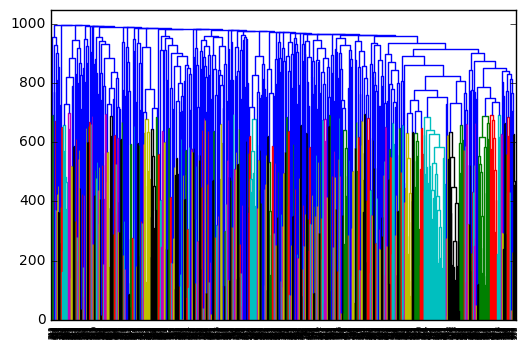

In [18]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(cosine)

### &#167; Associate the clusters with their top terms and print a list of the cluster number and the genres of that cluster.

## Part 2 / Classification With $k$-Nearest Neighbors 

In HW1 you learned about and used the $k$-NN algorithm.  You computed $k$ neighbors based on actual data.  This algorithm can also be used to do what is called a _lazy learner_ because it learns from the _testing_ phase instead of the _training_ phase.  This has performance issues unto itself since all the data it has to be seen. It can, nonetheless, be used as a way to do **supervised classification** since it has learned all the class labels already.

You will first start with just a warmup of the using the [NearestNeigbors algorithm](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) already implented in Scikit-learn.

### &#167; Using NearestNeighbors in SKL (Scikit-learn) find the 10 nearest neighbors using the movie data you have already begun exploring, storing the data in a variable called neigh

For example, you code will look like:

``` python
...
neigh = #<your nearest neighbor class>
...
```

**HINT:** See the examples on how to do this [here](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.kneighbors).

In [19]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(tfidf_array)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

### &#167; The function below takes a movie index (from the original data file, in order) and returns the titles of the $k$-nearest neighbors.  It requires you to have set the `neigh` variable to the NearestNeighbor class and have fitted the data to it.

In [20]:
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
import collections

docs = collections.OrderedDict()
with open("./data/top1000_movie_summaries.tsv") as fi:
    tsvReader = csv.reader(fi, delimiter='\t')
    for i, (title, plot) in enumerate(tsvReader):
        
        docs[title]=plot

vectorizer = TfidfVectorizer(min_df=1)
# create the tfidf matrix
tfidf_matrix = vectorizer.fit_transform(docs.values())

# convert the matrix to an array - which reduces the sparseness of the matrix
tfidf_array = tfidf_matrix.toarray()

def get_nn_movie_names(movie_index):
    print'\n'
    tfidf_array[movie_index]
    print("{}\n===".format(docs.keys()[movie_index]))
    for idx, dist in zip(np.nditer(neigh.kneighbors(tfidf_array[movie_index])[1]), 
                         np.nditer(neigh.kneighbors(tfidf_array[movie_index])[0])):
        if idx != movie_index: 
            print(u'{}'.format(docs.keys()[idx]))

### &#167; Use `get_nn_movie_names(index)` for the indices and associated movies below.  In one or two sentences give your opinion of how well this method compares to the lists in the links (this is not meant to be scientific). 
| index | movie name | similar movies link |
|-------|------------|---------------------|
| 34 | Saving Private Ryan | [http://www.similarkind.com/search?q=saving+private+ryan](http://www.similarkind.com/search?q=saving+private+ryan) |
| 26 | Life is Beautiful | [http://www.similarkind.com/search?q=the+green+mile](http://www.similarkind.com/search?q=the+green+mile) |
| 199 | Hotel Rwanda | [http://www.similarkind.com/search?q=hotel+rwanda](http://www.similarkind.com/search?q=hotel+rwanda) |

In [21]:
print get_nn_movie_names(34)
print get_nn_movie_names(24)
print get_nn_movie_names(199)



Saving Private Ryan
===


C:\Users\Sosa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Sosa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Sosa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Dirty Harry
Army of Darkness
The Sweet Hereafter
The Dark Knight
Avatar
The Player
X-Men: Days of Future Past
Spotlight
Volver
The Boy in the Striped Pajamas
None


Life Is Beautiful
===
Three Colors: Blue
Frost/Nixon
Freedom Writers
Vicky Donor
Thank You for Smoking
Awakenings
Ponyo
Billy Elliot
Giant
Selma
None


Hotel Rwanda
===


C:\Users\Sosa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Sosa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Sosa\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Wings of Desire
Moonrise Kingdom
Marathon Man
A Prophet
Man on the Moon
Enter the Dragon
No Man's Land
The Return
Snatch
Open Range
None


### &#167; In 1 or 2 sentences suggest ways to improve the results of the algorithm (e.g. more data, better features, etc.)?

## Part 3 / Classification With Decision Trees


As we learned, decision trees are a powerful way to build classifiers, especially since the output is interpretable.  By using information gain such as entropy and gini coefficient, nodes can be chosen that split the data in meaningful ways allowing the leaf nodes to provide the labels of a set of decisions as one follows each attribute at a decision point.

Scikit-learn [implements decision tree classifiers](http://scikit-learn.org/stable/modules/tree.html#tree) and we will use them for this part of the assignment.  To use this classifier, you will need to remember the following import

``` python
from sklearn import tree
```

As always, you should include these imports as well
```python
import pandas as pd
import numpy as np
```

### DATA FOR PART 3

We will be using data from the US Federal [Consumer Financial Protection Bureau (CFPB)](http://www.consumerfinance.gov/data-research/consumer-complaints/) which maintains a consumer complaint database.  In it there are a number of factors being stored, including company names, consumer narratives, complaint type, date, etc.

The dataset can be downloaded in its entirety [here](http://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data) as a CSV or JSON file and you will also find it in the [`data`](./data/) directory for this repo.  That file was retrieved on October 30, 2016 and represents data from March 2015 to August 2016 in about 27K rows.

### &#167; Read the complaint data into a Pandas Dataframe called `df` and restrict the data to 4 columns : `Product`, `Sub-product`, `Issue` and `Sub-issue`.

### &#167; Create a training dataset with 3000 random data points from `df` and call that `df_train`.

In [22]:
import numpy as np 
import pandas as pd

data_full = pd.DataFrame.from_csv("./data/Debt_Collection_Complaints_with_Consumer_Complaint_Narratives.csv")
data_transformed = data_full.loc[:,['Product','Sub-product','Issue','Sub-issue']]
print data_transformed

                       Product                            Sub-product  \
Date received                                                           
2015-03-23     Debt collection  Other (i.e. phone, health club, etc.)   
2015-03-23     Debt collection                            Payday loan   
2015-03-23     Debt collection                                Medical   
2015-03-23     Debt collection  Other (i.e. phone, health club, etc.)   
2015-03-23     Debt collection                               Mortgage   
2015-03-23     Debt collection                          I do not know   
2015-03-24     Debt collection  Other (i.e. phone, health club, etc.)   
2015-03-24     Debt collection                            Credit card   
2015-03-24     Debt collection                            Credit card   
2015-03-24     Debt collection                          I do not know   
2015-03-24     Debt collection                                   Auto   
2015-03-24     Debt collection                     

In [23]:
df_train_ix = np.random.choice(data_transformed.index, 3000,replace=False)
df_train = data_transformed.ix[df_train_ix]
print df_train

                       Product                            Sub-product  \
Date received                                                           
2016-06-07     Debt collection  Other (i.e. phone, health club, etc.)   
2016-06-07     Debt collection                                Medical   
2016-06-07     Debt collection                                Medical   
2016-06-07     Debt collection  Other (i.e. phone, health club, etc.)   
2016-06-07     Debt collection                          I do not know   
2016-06-07     Debt collection                            Credit card   
2016-06-07     Debt collection                          I do not know   
2016-06-07     Debt collection                                Medical   
2016-06-07     Debt collection                            Credit card   
2016-06-07     Debt collection                                Medical   
2016-06-07     Debt collection                            Payday loan   
2016-06-07     Debt collection                     

### HINTS

##### RESTRICTING DATAFRAME COLUMNS
Recall an easy way to restrict the columns of a dataframe :

```python
df[['col1', 'col2', 'coln']]
```

returns the dataframe with just `col1`, `col2`, ...

##### RANDOM NUMBERS IN NUMPY
Explore [`numpy.random.choice`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) which should help you understand how to obtain 3000 random numbers within the row  index range of your data.  Pay attention to the `replace` parameter so you do not get duplicates.

You will store this because it will be needed again later -- maybe use the variable `train_idxs`.

##### USING `DATAFRAME.IX[list_of_indices]` TO GET A SET OF ROWS BY INDEX

Review the [Pandas docs on selecting data](http://pandas.pydata.org/pandas-docs/stable/indexing.html) to learn about `ix`.

Consider what this example does,

```python
# assume df is a Dataframe with data in it

train_idxs = [0, 9, 14]
df.ix[train_idxs] 
# returns the dataframe with row 1, 10, 15
```

### &#167; Notice that the data are all categorical.  Most algorithms required a little work to get the data into a form that can be easily used.  Binarize `df_train` so that is it ready to be used in most typical scenarios.

#### HINTS

**label_binarize**
One way to do this is to explore  [label_binarize](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html).  You will need to write a lot more code (fewer than 10 lines) but you can do it.

**DictVectorizer**
Another way is to use [`DictVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) which is part of the feature extraction library of Scikit-learn.  

You should see how this trick is done from [http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/](http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/) as inspiration for your solution.


In [32]:
dft_train= pd.get_dummies(df_train)
labels_series = pd.Series()
labels = data_full.loc[df_train_ix,['Company response to consumer']]

labels_series = labels.squeeze() 
labels_series = labels_series.unique()

Now your data is ready! We are going to use the data to build a decision tree to classify the company response.  We might be able to use this data, for example, to understand which future compaints may need more attention by the agency.  If we build a good classifier, we might just be able to reduce the time, cost and staff stress.

### &#167; Build a DecisionTree from the training data in df_train.


#### HINTS

**DecisionTreeClassifier**

You will most certainly need to use [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Read up on this classfier and use it with `df_train`.

**Labeled data**

Your classifier is going to be more interesting if it can distinguish between the different classes of company response.

To get all the labels (for all your df rows WITH THE SAME INDEX AS YOUR TRAINING DATA):

```python
df[['Company response to consumer']].ix[[]]
```

should do the trick.  But this will get them for all rows.

Explore [Pandas.unique](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) to understand just how to get the set of labels you need.

### &#167; Draw the decision tree.

#### HINTS

**You can use the code from the demo in scikit-learn or build your own**

Use these to help you understand the code snippet below:
* `dtc` is your decision tree from the above
* `DV.feature_names_` is the DictVectorizer from above
* `target_names` are the class names

``` python
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(dtc, out_file="tree.dot", 
                         feature_names=DV.feature_names_,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 

graph = pydotplus.graph_from_dot_file("tree.dot")  
graph.write_png("tree.png")
```

### &#167; Look at the decision tree (stored in your PNG file). List 2 reasons why this WOULD or WOULD NOT be a good classifier for the company response. Turn in your PNG file along with your IPYNB file.

### &#167; Compute the Precision and Recall for this classifier - remember you will need to test on data you have not already seen!

#### HINTS
Instead of only pulling 3000 data points you might pull 6000 ad split -- using 3000 for test and 3000 for training.  There are, of course, other ways to do it as discussed in class.

* You could consider Scikit-learn's [`model_selection.train_test_split()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split);

* You will need to understand how [`DecisionTreeClassifier.predict()`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) works;

* You might want to explore the [metrics capabilities of Scikit-learn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) -- especially the `confusion_matrix()`, `precision_score()` and `recall_score()` methods.


In [34]:
from sklearn import tree
import pydotplus 
from IPython.display import Image 

dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dft_train,labels)
print dtc
dot_data = tree.export_graphviz(dtc)
print dot_data

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
None


AttributeError: 'NoneType' object has no attribute 'startswith'

In [ ]:
!jupyter nbconvert Homework2.ipynb --to markdown
!pandoc Homework2.md --template svm-latex-ms.tex -o Homework2.pdf